In [1]:
import numpy as np
import matplotlib.pyplot as plt

import figures
from cohort_model import run_simulation, MUTANT_CAP, MUTANT_WILD, get_mean_and_std

In [2]:
t_m_cap_f = 325
t_m_cap_m = 290
t_m_wild_f = 100
t_m_wild_m = 53

number_of_individuals = 1000
number_of_repetitions = 100
cohort = np.ones(number_of_individuals)

epsilon = 0.04

# The 8 parameters below are based on previous least-squares curve fitting (see paper for details)
alpha_f = 0.00287
kappa_f = 0.00842

alpha_m = 0.00057
kappa_m = 0.0173

hazard_rate_f = 0.0503 / (1 - epsilon)
hazard_rate_m = 0.0435 / (1 - epsilon)

omega = 0.0001
tau = 1.8 

In [3]:
# FEMALE CAPTIVITY
hazard_rate_parameters = dict(alpha=alpha_f, kappa=kappa_f)
captivity_f = run_simulation(number_of_repetitions, cohort, hazard_rate_parameters, t_m_cap_f, MUTANT_CAP)

In [4]:
# MALE CAPTIVITY
hazard_rate_parameters = dict(alpha=alpha_m, kappa=kappa_m)
captivity_m = run_simulation(number_of_repetitions, cohort, hazard_rate_parameters, t_m_cap_m, MUTANT_CAP)

In [5]:
# FEMALE WILD
hazard_rate_parameters = dict(alpha=alpha_f, kappa=kappa_f, epsilon=epsilon, hazard_rate_wild_type=hazard_rate_f)
wild_f = run_simulation(number_of_repetitions, cohort, hazard_rate_parameters, t_m_wild_f, MUTANT_WILD)

In [6]:
# MALE WILD
hazard_rate_parameters = dict(alpha=alpha_m, kappa=kappa_m, epsilon=epsilon, hazard_rate_wild_type=hazard_rate_m, omega=omega, tau=tau)
wild_m = run_simulation(number_of_repetitions, cohort, hazard_rate_parameters, t_m_wild_m, MUTANT_WILD)

In [7]:
# NORMALIZE
mean_cap_f, _ = get_mean_and_std(captivity_f)
mean_cap_m, _ = get_mean_and_std(captivity_m)
mean_wild_f, _ = get_mean_and_std(wild_f)
mean_wild_m, _ = get_mean_and_std(wild_m)

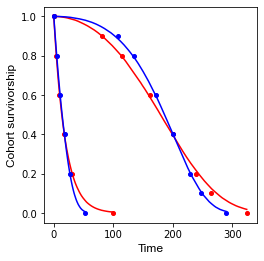

In [8]:
figures.plot_fig_4(t_m_cap_f, t_m_cap_m, t_m_wild_f, t_m_wild_m, mean_cap_f, mean_cap_m, mean_wild_f, mean_wild_m)